In [1]:
import numpy as np
import pandas as pd

# 출력을 소수점 이하 3자리로 제한
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision',3)

## 변수 초기화

In [2]:
df = pd.read_csv('python_stat_sample-master/data/ch2_scores_em.csv',index_col = 'student number')

# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame({'scores':scores},index = pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 중앙값
데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값

- 중앙값은 평균값에 비해 이상값에 강하다(크게 튀는 값이 있으면 평균값은 대표값이 될 수 없음)
- 데이터의 개수 n이 홀수라면 (n+1)/2번째 데이터가 중앙값
- 데이터의 개수 n이 짝수라면 n/2번째와 n/2+1번째 데이터의 평균이 중앙값

In [5]:
# 순서대로 나열
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [6]:
np.median(scores)

56.5

In [7]:
scores_df.median()

scores    56.5
dtype: float64

## 최빈값
데이터에서 가장 많이 나타나는 값
질적 데이터의 대푯값을 구할 때 사용되는 지표

* 도수분포표를 도입하면 양적 데이터에서도 최빈값을 자연스럽게 정의할 수 있다

In [8]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

# 데이터의 산포도 지표

## 분산과 표준편차

### 편차(Deviation)
편차는 각 데이터가 평균으로 부터 얼마나 떨어져 있는가를 나타내는 지표이다

In [9]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [10]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores-another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

### 분산(variance)
편차를 이용하는 것은 바람직한 생각이지만, 편차의 평군이 항상 0이 되므로 잘 사용하지 않음
따라서 편차의 제곱의 평균을 사용함

표본분산은 n으로 나누는 것이고 불편분산은 n-1로 나눈다

모집단의 분산값은 불편분산과 같으므로 통계에서 대부분은 불편분산이다


In [11]:
np.mean(deviation ** 2)

86.0

In [12]:
# numpy는 표본분산
np.var(scores)


86.0

In [13]:
# pandas는 불편분산
scores_df.var()

scores    95.556
dtype: float64

In [14]:
# ddof 파라미터를 0으로 바꾸면 표본분산을 계산할 수 있다
scores_df.var(ddof=0)

scores    86.0
dtype: float64

### 표준편차(standard deviation)
분산은 평균이나 원 데이터와 같은 단위를 사용하지 않는다

예를 들면 시험점수는 몇 점, 시험점수의 평균은 평균 몇 점처럼 표현을 하지만 분산은 (원 점수 - 평균점수)^2 이기 때문에 같은 단위를 사용할 수 없다

원래의 데이터와 동일한 단위를 쓰는 산포도의 지표를 얻기 위해 분산에 제곱근을 취한 표준편차를 사용한다

In [15]:
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [16]:
np.std(scores,ddof=0)

9.273618495495704

표준편차는 1 시그마라는 단위가 되어 평균에 더하거나 뺌으로서 시그마 구간을 만든다
- 평균 +- 1시그마 == 1시그마 구간
- 평균 +- 2시그마 == 2시그마 구간
- 평균 +- 3시그마 == 3시그마 구간


## 범위와 사분위 범위

### 사분위 범위(Interquartile range)
범위는 최대값과 최소값만 보기 때문에 큰 이상값이 하나라도 있으면 범위도 크게 변화한다.

따라서 데이터의 상위소%에 위치하는 값과 하위수%에 위치하는 값의 차이를 취하는 방법을 사용한다

- Q1 == 25%
- Q2 == 50%
- Q3 == 75%
- IQR == Q3 - Q1

In [17]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

## 데이터의 지표 정리

In [18]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 데이터의 정규화

### 표준화
데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화(standardization)라고 하며 ,

표준화된 데이터를 **표준화 변량(standardized data)** 이나 **Z점수(z-score)** 라고 한다

**표준화된 데이터는 평균이 0, 표준편차가 1이다**

$z_i=\frac{x_{i}-\overline{x}}{S}$

In [19]:
z = (scores - np.mean(scores))/np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [21]:
# 
np.mean(z).round(2),np.std(z).round(2)

(-0.0, 1.0)

### 편찻값
평균이 50, 표준편차가 10이 되도록 정규화한 값을 말한다

$z_{i} = 50 + 10*\frac{x_{i}-\overline{x}}{S}$

In [23]:
z = 50 + 10*(scores - np.mean(scores))/np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [24]:
scores_df['deviation value'] = z
scores_df

,scores,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 1차원 데이터의 시각화

In [25]:
english_scores = np.array(df['english'])

pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 도수분포표
데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세서 표로 정리한 것이 **도수분포표(frequency distribution)** 이다

0~100점의 시험점수를 10점씩 10개의 구간으로 나눈다고 하자

계급(Class) : (예, 0 ~ 10점, 11 ~ 20점) 계급폭으로 나뉜 구간

도수(frequency) : 각 계급에 속한 학생 수
계급폭 : 10점
계급수 : 10개

In [26]:
#도수분포표
freq,_ = np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [28]:
# DataFrame으로 결과를 정리
# 0~10,10~20,... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

#freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


50 ~ 70점 사이에 몰려있다는 것을 알 수 있다

**계급값** 은 각 계급을 대표하는 값으로, 계급의 중앙값이 이용된다.
60~70의 계급이면 계급값은 65점

In [29]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

**상대도수** 는 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지를 나타낸다

In [30]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

**누적상대도수** 는 해당 계급까지의 상대도수의 합을 나타낸다.

In [32]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

계급값과 상대도수와 누적상대도수를 도수분포표에 추가해보자

In [38]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency','relative frequency','cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


#### 최빈값 재검토
**도수분포표를 사용한 최빈값은 최대가 되는 계급의 계급값으로 정의된다**

도수분포표를 통해 60~70인 계급의 도수가 최대이므로 이 데이터의 최댓값은 65점이다

In [46]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

최빈값으 도수분포표를 만드는 방법에 의존한다

예를들어 계급폭을 4점으로 하여 도수분포표를 계산하면 최빈값은 66점이 나온다

## 히스토그램
**도수분포표를 막대그래프로 나타낸 것**

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

히스토그램은 hist 메서드로 그린다

[ 0.  0.  0.  2.  8. 16. 18.  6.  0.  0.] [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.] Rectangle(xy=(50, 0), width=10, height=16, angle=0)


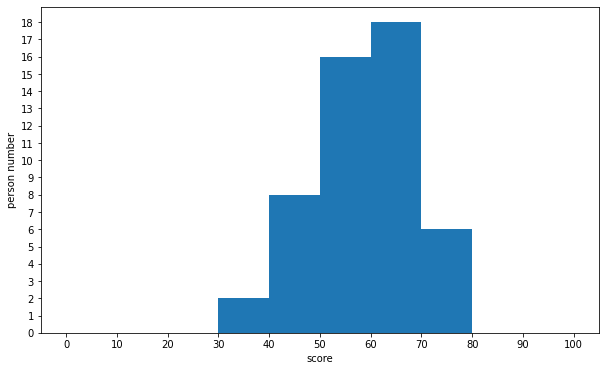

In [50]:
# 캔버스를 생성
# figsize(가로,세로) 2차원 평면의 크기 설정
fig = plt.figure(figsize=(10,6))
# 캔버스 위에 그래프를 그리기 위한 영역을 지정
#인수는 영역을 1*1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
# freq : 구간별 도수 정보
# bins : 계급 리스트
# patches : 그래프의 모양(type : BarContainer)
freq,bins,patches = ax.hist(english_scores, bins=10, range=(0,100))
print(freq,bins,patches[5])
# X축에 레이블 부여
ax.set_xlabel('score')
# Y축에 레이블 부여
ax.set_ylabel('person number')
# X축을 0,10,20,...,100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
# Y축을 0,1,2...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))
# 그래프 표시
plt.show()

계급수를 늘리면 더 세부적인 데이터의 분포를 볼 수 있다

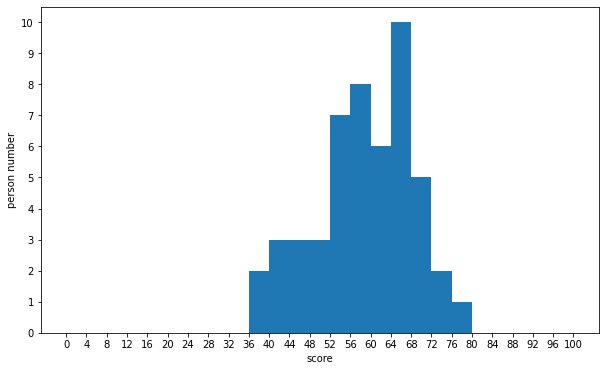

In [55]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq,_,_ = ax.hist(english_scores,bins=25,range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프와 함께 그립니다

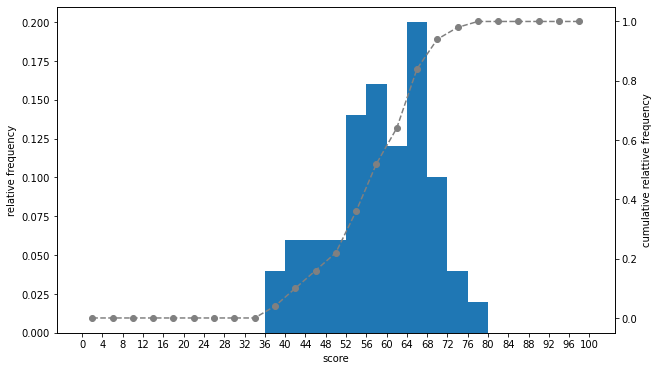

In [71]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
# X축만 공유하고 Y축은 공유하지 않음
ax2=ax1.twinx()

#상대도수의 히스토그램으로 하기 위해서는, 각각의 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
# np.ones_like(x) : x와 같은 길이의 ndarray를 만들되, 모든 원소의 값은 1
# weights : 1/n로 구성된 ndarray
# weights를 hist메서드의 weights값으로 넣음으로서 도수값이 (각각의 도수*각각의 가중치)의 값들로 모두 치환됨
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores,bins=25,range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'fh gkaus wjatjsdl rmfuwla
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relattive frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

## 상자그림(Box Plot)
**상자그림은 데이터의 산포도를 표현하는 그림이다.**

**상자그림을 그리면 데이터의 분포와 이상값을 시각적으로 파악할 수 있다**

- 상자는 Q1부터 Q3을 나타내고, 따라서 상자의 범위는 IQR를 의미한다

- 수염은 Q1-1.5IQR부터 Q3+1.5IQR을 나타낸다.

- 여기에 들어가지 않은 데이터는 이상값이 된다

- 중앙의 선은 중앙값을 의미한다

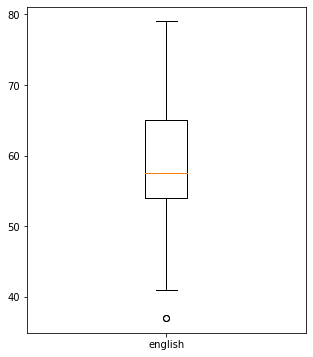

In [70]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()